# Notebook per l'estrazione delle misure, il calcolo di Anova e l'esecuzione del Tukey test.


In [1]:
#%matplotlib notebook
import numpy as np
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

Dopo aver eseguito l'indicizzazione si è eseguita la valutazione, usando trec_eval, passando il file contenente i giudizi di rilevanza (binaria). Per le quattro diverse run ho salvato ogni output su un file di testo. La seguente cella esegue il parsing del file andando a cercare i valori di AP, il valore MAP (ovvero la media di tutti e 50 i valori di Average Precision per ogni run), il valore rprec e la Precision at 10.
Per identificare le run si utilizza un numero da 0 a 3, l'ordine segue quello richiesto nella consegna dell'homework:

run 0: PorterStemmer, Stopwords, BM25

run 1: PorterStemmer, Stopwords, TF_IDF 

run 2: PorterStemmer, BM25

run 3: senza nulla, TF_IDF

In [2]:
#Funzione che parsa il file e rileva quindi per ogni run le misure AP e MAP. Stampa inoltre i 4 valori di Precision at 10
#e RPrec (uno per ogni run)

#RprecALL = []
#P10ALL = []
mapALL = []
def getMeasures(file, AP, p10, rprec, runID):
    f = open(file,'r')
    datasetLine = [x for x in f.readlines()] #list comprehension
    f.close()

    for line in datasetLine:
        split = line.split()
        if(split[1]!='all'):
            if(split[0]=='map'):
                AP.append(split[2])
            elif(split[0]=='P_10'):
                p10.append(split[2])
            elif(split[0]=='Rprec'):
                rprec.append(split[2])
        else: #(split[1]=='all')
            if (split[0]=='map'):# and split0[1]=='all'):
                print("Map della Run #"+ str(runID))
                print(split[2])
                mapALL.append(split[2])
            elif (split[0]=='P_10'): # and split0[1]=='all'):
                print("Precision at 10 della Run #"+ str(runID))
                print(split[2])
#                P10ALL.append(split[2])
            elif (split[0]=='Rprec'): # and split0[1]=='all'):
                print("Rprec della Run #" + str(runID))
                print(split[2])
#                RprecALL.append(split[2])
                
    print("-----------------------------------------------")

In [3]:
map_0 = []
p10_0 = []
rprec_0 = []

map_1 = []
p10_1 = []
rprec_1 = []

map_2 = [] 
p10_2 = []
rprec_2 = []

map_3 = []
p10_3 = []
rprec_3 = []

getMeasures('0_PS&SL_BM25.txt', map_0, p10_0, rprec_0, 0)
getMeasures('1_PS&SL_TF-IDf.txt', map_1, p10_1, rprec_1, 1)
getMeasures('2_PS_BM25.txt', map_2, p10_2, rprec_2, 2)
getMeasures('3_niente_TF-IDF.txt', map_3, p10_3, rprec_3, 3)

print("Map: ", mapALL)
print("-----------------------------------------------")
#print("Precision at 10, run 0:\n", p10_0)
#print("Precision at 10, run 1:\n", p10_1)
#print("Precision at 10, run 2:\n", p10_2)
#print("Precision at 10, run 3:\n", p10_3)
#print("--------------------------------------")
#print("Precision at Recall Base, run 0:\n", rprec_0)
#print("Precision at Recall Base, run 1:\n", rprec_1)
#print("Precision at Recall Base, run 2:\n", rprec_2)
#print("Precision at Recall Base, run 3:\n", rprec_3)

Map della Run #0
0.2126
Rprec della Run #0
0.2705
Precision at 10 della Run #0
0.4840
-----------------------------------------------
Map della Run #1
0.2120
Rprec della Run #1
0.2725
Precision at 10 della Run #1
0.4800
-----------------------------------------------
Map della Run #2
0.2108
Rprec della Run #2
0.2740
Precision at 10 della Run #2
0.4740
-----------------------------------------------
Map della Run #3
0.1875
Rprec della Run #3
0.2460
Precision at 10 della Run #3
0.4300
-----------------------------------------------
Map:  ['0.2126', '0.2120', '0.2108', '0.1875']
-----------------------------------------------


In [4]:
#matrice con run sulle colonne e AP sulle righe
M = np.vstack((map_0,map_1, map_2, map_3))
print(M.T)

[['0.5229' '0.5191' '0.5195' '0.4292']
 ['0.0237' '0.0225' '0.0246' '0.0232']
 ['0.2362' '0.2330' '0.2340' '0.3109']
 ['0.1677' '0.1549' '0.1035' '0.1435']
 ['0.1332' '0.1309' '0.1435' '0.0798']
 ['0.0106' '0.0107' '0.0109' '0.0106']
 ['0.2956' '0.3028' '0.2999' '0.3094']
 ['0.2997' '0.3001' '0.2917' '0.2105']
 ['0.0462' '0.0533' '0.0477' '0.0533']
 ['0.2238' '0.2184' '0.2296' '0.4232']
 ['0.3065' '0.3073' '0.3106' '0.2796']
 ['0.1122' '0.1129' '0.0995' '0.0968']
 ['0.0454' '0.0447' '0.0453' '0.0350']
 ['0.5543' '0.5528' '0.5452' '0.5193']
 ['0.7150' '0.7204' '0.7030' '0.7093']
 ['0.3440' '0.3193' '0.3569' '0.2028']
 ['0.1248' '0.1184' '0.1215' '0.1006']
 ['0.4079' '0.4067' '0.3800' '0.4094']
 ['0.2746' '0.2761' '0.2754' '0.2570']
 ['0.1254' '0.1190' '0.1094' '0.0514']
 ['0.0574' '0.0569' '0.0555' '0.0560']
 ['0.2488' '0.2499' '0.2676' '0.2097']
 ['0.3881' '0.3763' '0.3897' '0.3888']
 ['0.2389' '0.2370' '0.2314' '0.2827']
 ['0.2589' '0.2617' '0.2612' '0.2583']
 ['0.0052' '0.0099' '0.00

Nelle seguenti celle saranno plottati i risultati ottenuti:
- valore di MAP per ogni run
- valori di AP per ogni topic (quattro grafici diversi a seconda delle diverse run)
- test di Tukey, condotto con le diverse misure, dove sono visibili i paragoni tra le diverse run

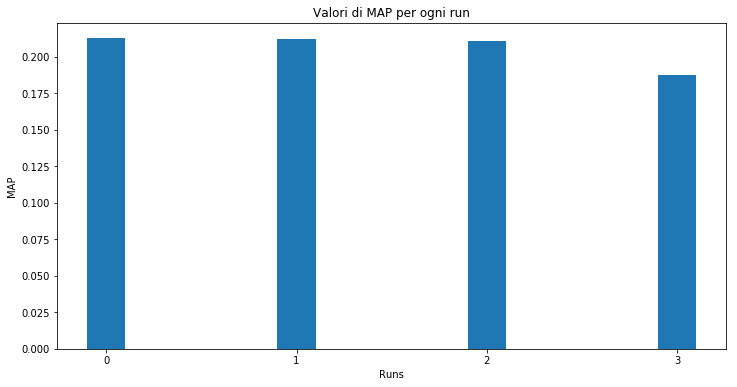

In [17]:
#plot dei 4 valori di MAP (map_all) 
mapALL = list(map(float, mapALL))

#plt.plot([0,1,2,3],mapALL, marker='o')
plt.bar([0,1,2,3], mapALL, width=0.2)
plt.title("Valori di MAP per ogni run")
plt.xticks(range(0, 4))
plt.xlabel("Runs")
plt.ylabel("MAP")
plt.savefig('C:/Users/Ylenia/Desktop/Documents/uni/1_InformationRetrieval/Homework/Hw1/plot/MAPhist.png', format='png', dpi=1000)
plt.show()

#Questo secondo grafico mostra maggiormente la differenza tra le varie run
#plt.bar([0,1,2,3], mapALL, width=0.2)
#plt.title("Valori di MAP(all) per ogni run")
#plt.xticks(range(0, 4))
#plt.xlabel("Runs")
#plt.ylabel("MAP")
#plt.ylim(0.170, 0.220)
#plt.savefig('C:/Users/Ylenia/Desktop/Documents/uni/1_InformationRetrieval/Homework/Hw1/plot/MAP-Yaxis.png', format='png', dpi=1000)
#plt.show()

#plt.plot([0,1,2,3],mapALL, marker='o')
#plt.title("Valori di MAP(all) per ogni run")
#plt.xticks(range(0, 4))
#plt.xlabel("Runs")
#plt.ylabel("MAP")
#plt.savefig('C:/Users/Ylenia/Desktop/Documents/uni/1_InformationRetrieval/Homework/Hw1/plot/MAPpunti.png', format='png', dpi=1000)
#plt.show()

In [6]:
#funzione per plot dei diversi valori di una misura (Average Precision (AP), P10 e Rprec nel nostro caso)
#per una singola run, per ogni topic

def plotAP(arrayM, clr, runID, label):
    #print(len(map_0))
    x = np.empty(50)
    b = np.arange(351, 401, 1) #da 351 a 400 con passo 1
    ind = np.arange(len(x))
    np.put(x, ind, b)
    #print(x)
    #print(arrayM)
    arrayM = list(map(float, arrayM))
    plt.rcParams["figure.figsize"]=[12.0,6.0]
    plt.title(str(label) + " per la run "+ str(runID))
#    plt.plot(x,arrayMAP, marker='o', color=clr)
    plt.bar(x, arrayM, width=0.6, color=clr)
    plt.xticks(range(351, 401, 1), rotation=90)
    plt.xlabel("Topics")
    #plt.ylabel("Average Precision")
    path = 'C:/Users/Ylenia/Desktop/Documents/uni/1_InformationRetrieval/Homework/Hw1/plot/'
    plt.ylabel(label)
    plt.savefig(path + str(label) + str(runID) + '.png', format='png', dpi=500)
    plt.show()

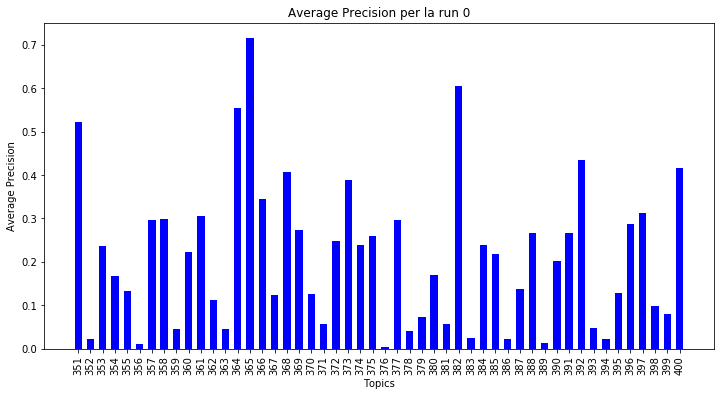

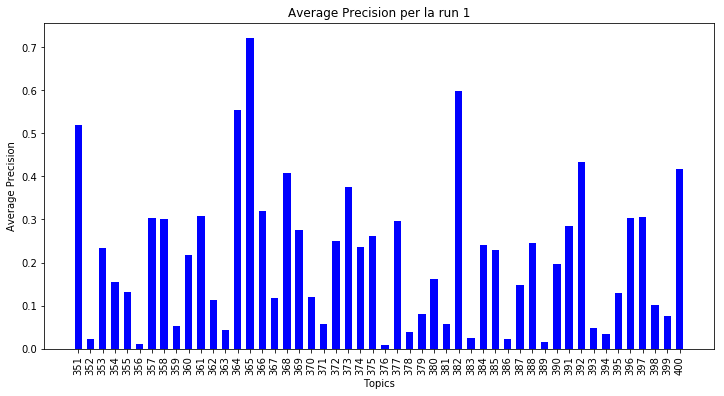

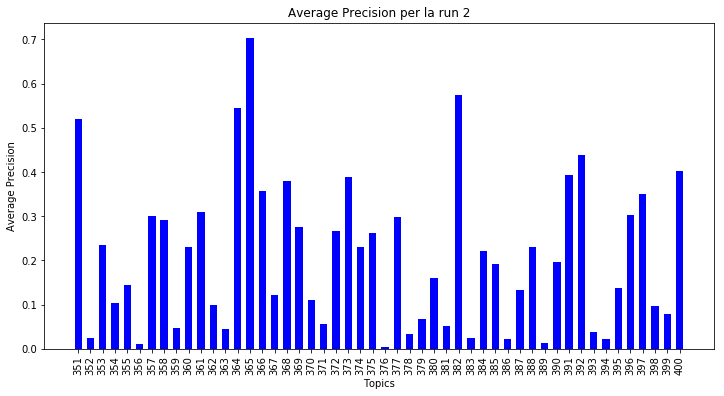

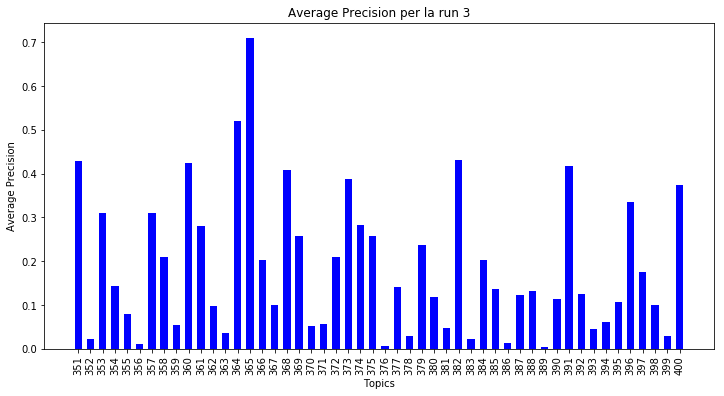

In [7]:
plotAP(map_0, "b", 0,"Average Precision")
plotAP(map_1, "b", 1,"Average Precision")
plotAP(map_2, "b", 2, "Average Precision")
plotAP(map_3, "b", 3, "Average Precision")

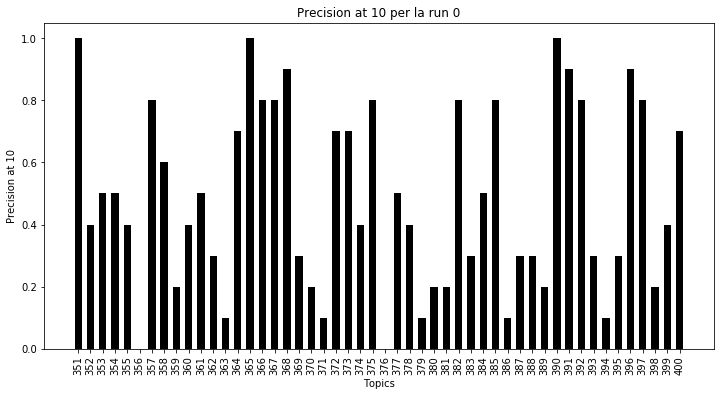

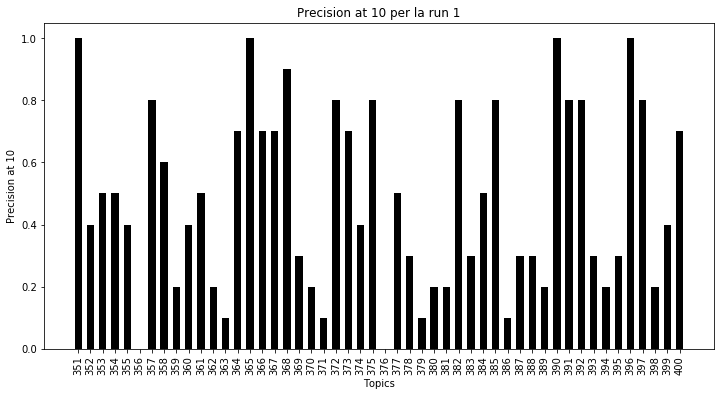

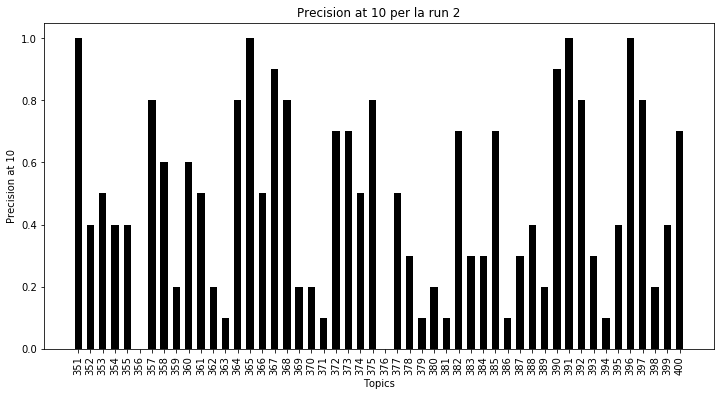

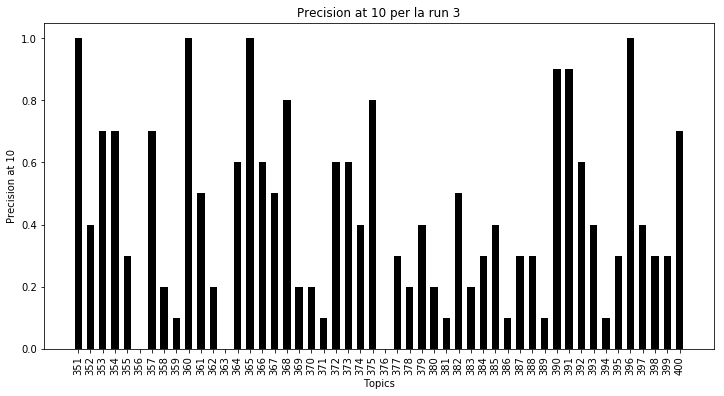

In [8]:
plotAP(p10_0, "black", 0, "Precision at 10")
plotAP(p10_1, "black", 1,"Precision at 10")
plotAP(p10_2, "black", 2,"Precision at 10")
plotAP(p10_3, "black", 3,"Precision at 10")

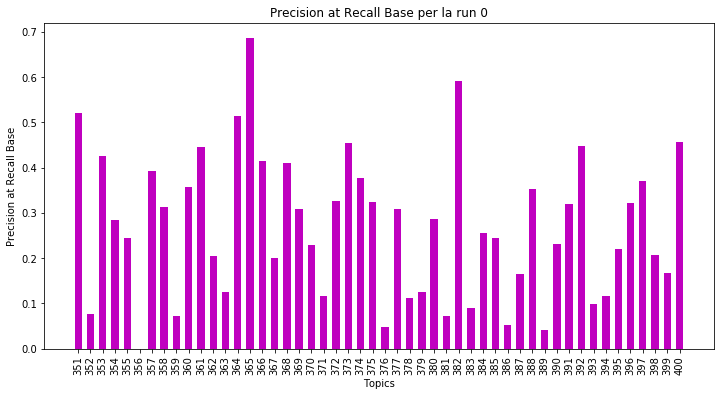

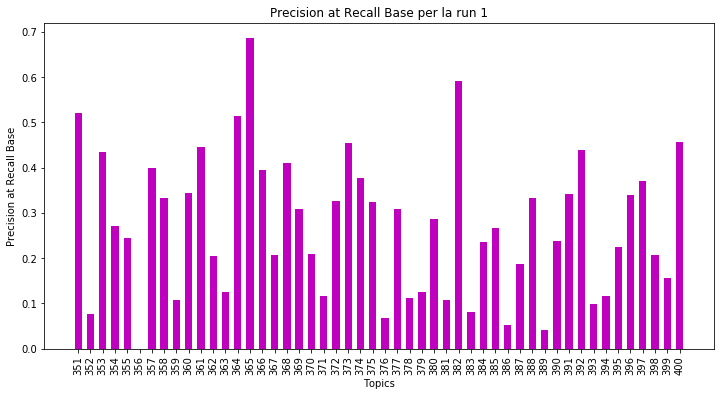

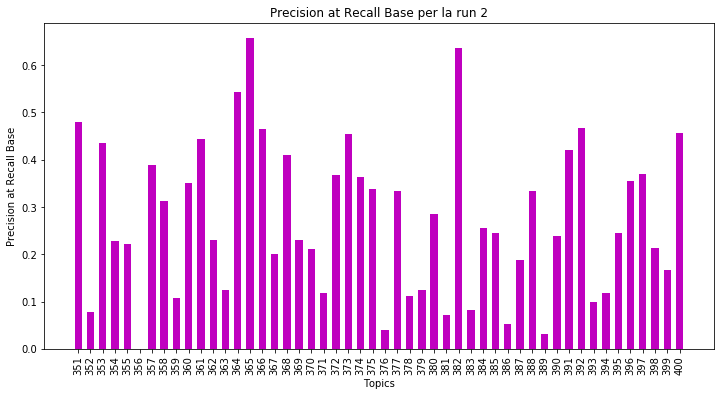

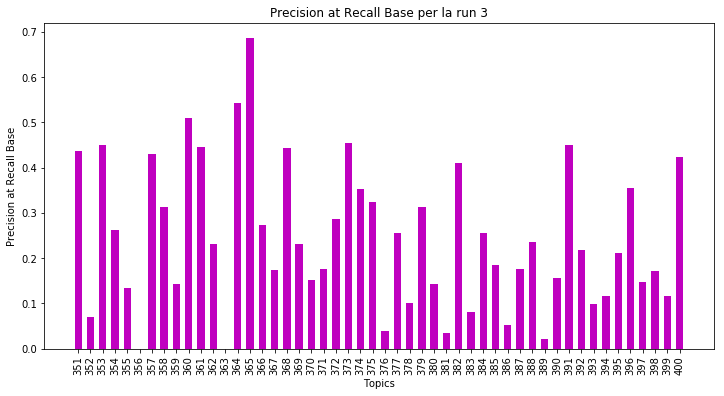

In [9]:
plotAP(rprec_0, "m", 0, "Precision at Recall Base")
plotAP(rprec_1, "m", 1, "Precision at Recall Base")
plotAP(rprec_2, "m", 2, "Precision at Recall Base")
plotAP(rprec_3, "m", 3, "Precision at Recall Base")

Calcolo ora la funzione ANOVA 1 way.

Se il p_value restituito (l'area sotto la curva della distribuzione) è minore del parametro alpha allora possiamo rigettare la null hypothesis, altrimenti rifiutiamo di rigettarla, concludendo che i valori hanno la stessa distribuzione.

In [10]:
#compute ANOVA 1 way
import scipy.stats as stats
alpha=0.05

f_stat, p_val = stats.f_oneway(map_0, map_1, map_2, map_3)

print("f_stat (F-value of the test) = ",f_stat)
print("pval (associated p-value from the F-distribution)= ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("Rigetto la null hypothesis => the differences between some of the means are statistically significant")
else:
    print("fail to reject null hypothesis => same distribution")

f_stat (F-value of the test) =  0.269822428311433
pval (associated p-value from the F-distribution)=  0.8471081879709074
fail to reject null hypothesis => same distribution


Il test di Tukey è un metodo comune per condurre un'analisi dopo il calcolo dell'Anova 1-way. Questo test, nel nostro caso, compara tutte le possibili coppie di run e mette maggiormente in evidenza le differenze.

In [11]:
v_maps = np.concatenate([map_0, map_1, map_2, map_3])
print(v_maps.shape)
runs=[]
#prova=[]
for i in range (4):
    for j in range (50):
        runs.append("run"+str(i))
#print(runs)
mc = MultiComparison(v_maps.astype('float'), runs)

#result = mc.tukeyhsd()
result=mc.tukeyhsd(alpha=0.05)
#print(result)
print(mc.groupsunique)
print("reject: ", result.reject)
print("meandiffs:", result.meandiffs)
print("confint: ",result.confint)
print("std_pairs: ",result.std_pairs)
print("q_crit: ",result.q_crit)
print(result.summary())

(200,)
['run0' 'run1' 'run2' 'run3']
reject:  [False False False False False False]
meandiffs: [-0.000532 -0.001754 -0.025094 -0.001222 -0.024562 -0.02334 ]
confint:  [[-0.0865202  0.0854562]
 [-0.0877422  0.0842342]
 [-0.1110822  0.0608942]
 [-0.0872102  0.0847662]
 [-0.1105502  0.0614262]
 [-0.1093282  0.0626482]]
std_pairs:  [0.0234638 0.0234638 0.0234638 0.0234638 0.0234638 0.0234638]
q_crit:  3.6647169573500507
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0005  -0.0865 0.0855 False 
 run0   run2  -0.0018  -0.0877 0.0842 False 
 run0   run3  -0.0251  -0.1111 0.0609 False 
 run1   run2  -0.0012  -0.0872 0.0848 False 
 run1   run3  -0.0246  -0.1106 0.0614 False 
 run2   run3  -0.0233  -0.1093 0.0626 False 
--------------------------------------------


halfwidths (margine d'errore):  [0.0429941 0.0429941 0.0429941 0.0429941]


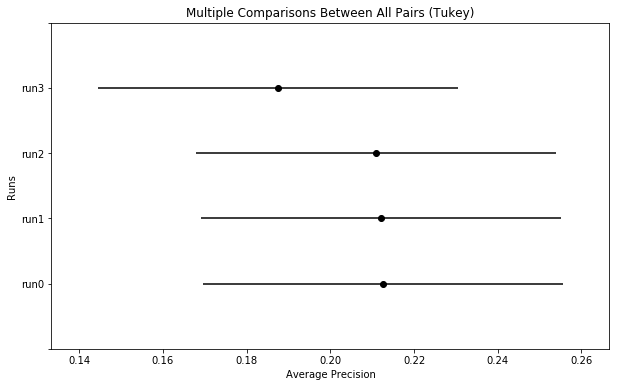

In [12]:
#result.plot_simultaneous(xlabel="Average Precision",ylabel="Runs")    # Plot group confidence intervals
result.plot_simultaneous(xlabel="Average Precision",ylabel="Runs").savefig('C:/Users/Ylenia/Desktop/Documents/uni/1_InformationRetrieval/Homework/Hw1/plot/TukeyTestMAP.png', format='png', dpi=1000)
#print(result.meandiffs)
print("halfwidths (margine d'errore): ",result.halfwidths)
#print(result.summary())

In [13]:
f_stat, p_val = stats.f_oneway(p10_0, p10_1, p10_2, p10_3)

print("f_stat (F-value of the test) = ",f_stat)
print("pval (associated p-value from the F-distribution)= ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("Rigetto la null hypothesis => the differences between some of the means are statistically significant")
else:
    print("fail to reject null hypothesis => same distribution")

f_stat (F-value of the test) =  0.35778395335621926
pval (associated p-value from the F-distribution)=  0.7835600894153874
fail to reject null hypothesis => same distribution


(200,)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0005  -0.0865 0.0855 False 
 run0   run2  -0.0018  -0.0877 0.0842 False 
 run0   run3  -0.0251  -0.1111 0.0609 False 
 run1   run2  -0.0012  -0.0872 0.0848 False 
 run1   run3  -0.0246  -0.1106 0.0614 False 
 run2   run3  -0.0233  -0.1093 0.0626 False 
--------------------------------------------
['run0' 'run1' 'run2' 'run3']
halfwidths (margine d'errore):  [0.07660477 0.07660477 0.07660477 0.07660477]


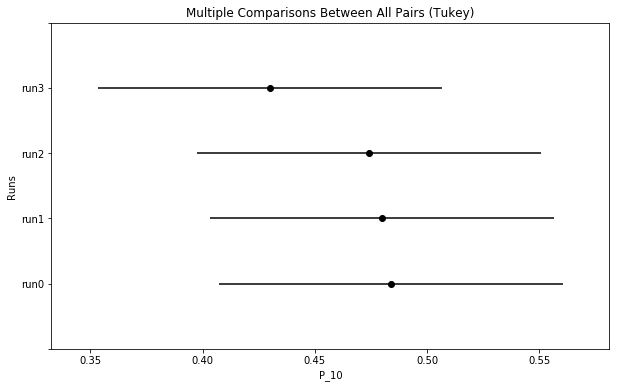

In [14]:
v_prec = np.concatenate([p10_0, p10_1, p10_2, p10_3])
print(v_prec.shape)
runs=[]
#prova=[]
for i in range (4):
    for j in range (50):
        runs.append("run"+str(i))
#print(runs)
mc1 = MultiComparison(v_prec.astype('float'), runs)

#result = mc.tukeyhsd()
result1=mc1.tukeyhsd(alpha=0.05)
print(result)
print(mc1.groupsunique)
#print("reject: ", result.reject)
#print("meandiffs:", result.meandiffs)
#print("confint: ",result.confint)
#print("std_pairs: ",result.std_pairs)
#print("q_crit: ",result.q_crit)
#print(result.summary())

result1.plot_simultaneous(xlabel="P_10",ylabel="Runs").savefig('C:/Users/Ylenia/Desktop/Documents/uni/1_InformationRetrieval/Homework/Hw1/plot/TukeyTestP10.png', format='png', dpi=1000)    # Plot group confidence intervals
#print(result.meandiffs)
print("halfwidths (margine d'errore): ",result1.halfwidths)
#print(result.summary())

In [15]:
f_stat, p_val = stats.f_oneway(rprec_0, rprec_1, rprec_2, rprec_3)

print("f_stat (F-value of the test) = ",f_stat)
print("pval (associated p-value from the F-distribution)= ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("Rigetto la null hypothesis => the differences between some of the means are statistically significant")
else:
    print("fail to reject null hypothesis => same distribution")

f_stat (F-value of the test) =  0.35084941805375086
pval (associated p-value from the F-distribution)=  0.7885747493027742
fail to reject null hypothesis => same distribution


(200,)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0005  -0.0865 0.0855 False 
 run0   run2  -0.0018  -0.0877 0.0842 False 
 run0   run3  -0.0251  -0.1111 0.0609 False 
 run1   run2  -0.0012  -0.0872 0.0848 False 
 run1   run3  -0.0246  -0.1106 0.0614 False 
 run2   run3  -0.0233  -0.1093 0.0626 False 
--------------------------------------------
['run0' 'run1' 'run2' 'run3']
halfwidths (margine d'errore):  [0.04100297 0.04100297 0.04100297 0.04100297]


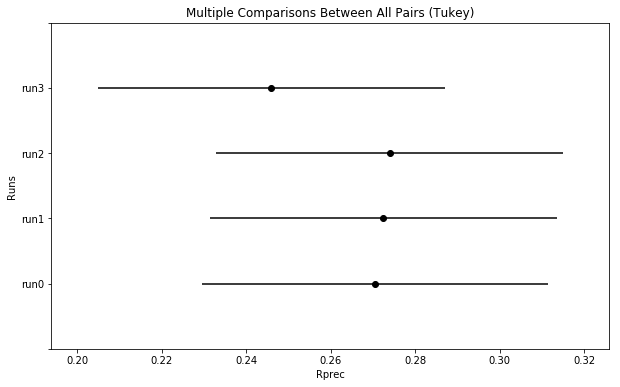

In [16]:
v_Rprec = np.concatenate([rprec_0, rprec_1, rprec_2, rprec_3])
print(v_Rprec.shape)
runs=[]
#prova=[]
for i in range (4):
    for j in range (50):
        runs.append("run"+str(i))
#print(runs)
mc1 = MultiComparison(v_Rprec.astype('float'), runs)

#result = mc.tukeyhsd()
result1=mc1.tukeyhsd(alpha=0.05)
print(result)
print(mc1.groupsunique)
#print("reject: ", result.reject)
#print("meandiffs:", result.meandiffs)
#print("confint: ",result.confint)
#print("std_pairs: ",result.std_pairs)
#print("q_crit: ",result.q_crit)
#print(result.summary())

result1.plot_simultaneous(xlabel="Rprec",ylabel="Runs").savefig('C:/Users/Ylenia/Desktop/Documents/uni/1_InformationRetrieval/Homework/Hw1/plot/TukeyTestRprec.png', format='png', dpi=1000)    # Plot group confidence intervals
#print(result.meandiffs)
print("halfwidths (margine d'errore): ",result1.halfwidths)